1. Explain every line of the HH code 

In [31]:
import numpy as np
#importing library numpy to do math 
def alphaM(V):
    return (2.5-0.1*(V+65)) / (np.exp(2.5-0.1*(V+65)) -1)
    #alpha M function: forward rate functions for Na+ activation channels (m gate). Depends on voltage
def betaM(V):
    return 4*np.exp(-(V+65)/18)
    #beta M function: backward rate function for Na+ activation channels (m gate). Depends on voltage
def alphaH(V):
    return 0.07*np.exp(-(V+65)/20)
    #forward rate function for h gate
def betaH(V):
    return 1/(np.exp(3.0-0.1*(V+65))+1)
    #backwards rate function for h gate
def alphaN(V):
    return (0.1-0.01*(V+65)) / (np.exp(1-0.1*(V+65)) -1)
    #forward rate funciton for n gate
def betaN(V):
    return 0.125*np.exp(-(V+65)/80)
    #backwards rate funciton for n gate

def HH(I0,T0): #function that makes the HH model lol 
    dt = 0.01; #change in time "Step size"
    T  = int(np.ceil(T0/dt))  # the number of steps to take in simulation. t will be divided by dt. so if you want 100ms, dt is 0.01 which means 10,000 steps in the simulation
    gNa0= 120   # [mS/cm^2]  all gs symbolize max conductance (you can ignore the 0s thats just what hes calling it)
    ENa  = 115;  # [mV]      all Es symbolize equilibrium potential 
    gK0  = 36;   # [mS/cm^2]
    EK   = -12;  # [mV]
    gL0  = 0.3;  # [mS/cm^2]
    EL   = 10.6; # [mV]

    t = np.arange(0,T)*dt #t is time 0 to t-1 steps of dt
    V = np.zeros([T,1]) #placeholders for model dynamics
    m = np.zeros([T,1]) #placeholders for model dynamics
    h = np.zeros([T,1]) #placeholders for model dynamics
    n = np.zeros([T,1]) #placeholders for model dynamics

    V[0]=-70.0 #initial values. Q: Are these important? Y
    m[0]=0.05
    h[0]=0.54
    n[0]=0.34

    for i in range(0,T-1): #we are stepping forward in time 
        V[i+1] = V[i] + dt*(gNa0*m[i]**3*h[i]*(ENa-(V[i]+65)) + gK0*n[i]**4*(EK-(V[i]+65)) + gL0*(EL-(V[i]+65)) + I0); #Input
        m[i+1] = m[i] + dt*(alphaM(V[i])*(1-m[i]) - betaM(V[i])*m[i]); #dynamics of each gate... using forward and backward activation/rate functions
        h[i+1] = h[i] + dt*(alphaH(V[i])*(1-h[i]) - betaH(V[i])*h[i]); #dynamics of each gate... using forward and backward activation/rate functions 
        n[i+1] = n[i] + dt*(alphaN(V[i])*(1-n[i]) - betaN(V[i])*n[i]); #dynamics of each gate... using forward and backward activation/rate functions
    return V,m,h,n,t


5. Increase/Decrease Potassium

2. How does the model change with input size?

array([-40.80748132])

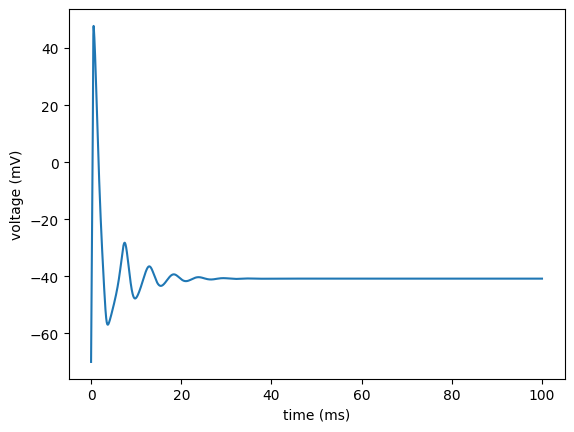

In [32]:
import matplotlib.pyplot as plt
plt.plot(t,V)
plt.xlabel("time (ms)")
plt.ylabel("voltage (mV)")
V[-1] #where is it going to rest?

In [33]:
I0 = 10;
T0 = 100;
[V,m,h,n,t] = HH(I0,T0)

(45.0, 55.0)

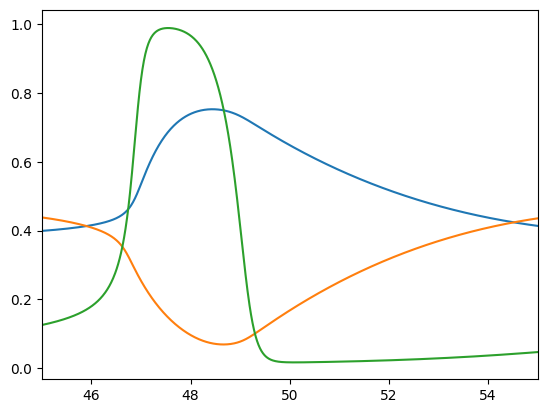

In [34]:
plt.plot(t,n)
plt.plot(t,h)
plt.plot(t,m)
#plt.legend 
#add legends
plt.xlim(45,55) #zooming in at a particular time point 

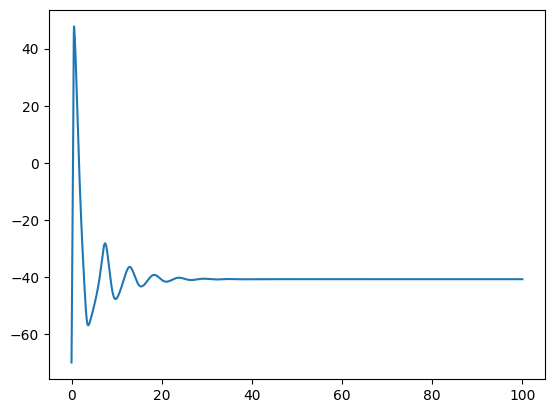

In [35]:
I0 = 200;
T0 = 100;
[V,m,h,n,t] = HH(I0,T0)
plt.plot(t,V)
#input at 200- what happened??
    #resting at a higher potential. What is it? what happened? Is it physically meaningful or just an oddity of our model? Based in reality or a byproduct of the HH model?

3. The F-I Curve

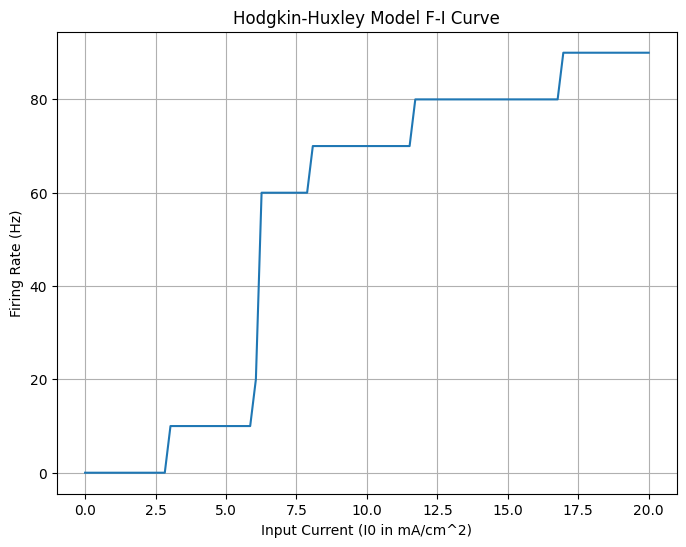

In [36]:

import numpy as np
import matplotlib.pyplot as plt

# Define the HH model (with missing parameter definitions)
def HH(I0, T0=100):
    # Define model parameters (use your parameter values)
    dt = 0.01
    T = int(np.ceil(T0 / dt))
    t = np.arange(0, T) * dt

    V = np.zeros(T)
    m = np.zeros(T)
    h = np.zeros(T)
    n = np.zeros(T)

    # Initialize model state variables
    V[0] = -70.0
    m[0] = 0.05
    h[0] = 0.54
    n[0] = 0.34

    # Define constants (use your parameter values)
    gNa0 = 120.0
    ENa = 115.0
    gK0 = 36.0
    EK = -12.0
    gL0 = 0.3
    EL = 10.6

    firing_rate = 0  # Initialize firing rate

    for i in range(0, T - 1):
        # Update model variables (use your HH equations)
        V[i + 1] = V[i] + dt * (
                gNa0 * m[i] ** 3 * h[i] * (ENa - (V[i] + 65)) +
                gK0 * n[i] ** 4 * (EK - (V[i] + 65)) +
                gL0 * (EL - (V[i] + 65)) + I0
        )

        m[i + 1] = m[i] + dt * (alphaM(V[i]) * (1 - m[i]) - betaM(V[i]) * m[i])
        h[i + 1] = h[i] + dt * (alphaH(V[i]) * (1 - h[i]) - betaH(V[i]) * h[i])
        n[i + 1] = n[i] + dt * (alphaN(V[i]) * (1 - n[i]) - betaN(V[i]) * n[i])

        # Count spikes (threshold crossing)
        if V[i] < 0 and V[i + 1] >= 0:
            firing_rate += 1

    # Calculate firing rate in Hz
    firing_rate /= (T0 / 1000.0)  # Convert to Hz (milliseconds to seconds)

    return firing_rate

# Define input current range
input_currents = np.linspace(0, 20, 100)  # Adjust the range as needed

# Simulate the HH model for different input currents and calculate firing rates
firing_rates = []

for I0 in input_currents:
    firing_rate = HH(I0, T0=100)  # Adjust T0 as needed
    firing_rates.append(firing_rate)

# Plot the F-I curve
plt.figure(figsize=(8, 6))
plt.plot(input_currents, firing_rates)
plt.xlabel('Input Current (I0 in mA/cm^2)')
plt.ylabel('Firing Rate (Hz)')
plt.title('Hodgkin-Huxley Model F-I Curve')
plt.grid(True)
plt.show()
